Pima Indians Diabetes Data Set数据探索

数据说明： Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。

数据集共9个字段: 0列为pregnants(怀孕次数)； 1列为Plasma_glucose_concentration(口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度)； 2列为blood_pressure(舒张压,单位:mm Hg） 3列为Triceps_skin_fold_thickness(三头肌皮褶厚度,单位：mm） 4列为serum_insulin(餐后血清胰岛素,单位:mm） 5列为BMI,体重指数（体重（公斤）/ 身高（米）^2） 6列为Diabetes_pedigree_function(糖尿病家系作用) 7列为Age(年龄) 8列为Target(分类变量,0或1）

数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

p.s.: Kaggle也有一个Practice Fusion Diabetes Classification任务，可以试试:) https://www.kaggle.com/c/pf2012-diabetes


# 1. 探索数据集

知道数据集的基本信息对我们后续进行特征工程和选择机器学习模型有用

In [1]:
#首先 import 必要的模块
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

# 读取数据

In [2]:
train = pd.read_csv("diabetes.csv")
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
train.shape

(768, 9)

In [6]:
# 查看数据的基本信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# 查看数值型特征的基本统计量
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
NaN_col_names = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(train[NaN_col_names] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

## 查看每个变量的分布
## Target

Text(0,0.5,'Number of occurences')

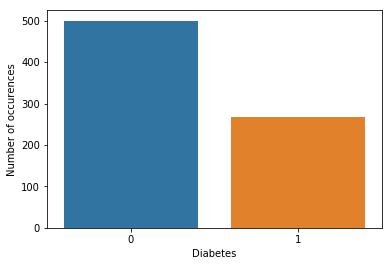

In [10]:
sns.countplot(train.Outcome)
plt.xlabel("Diabetes")
plt.ylabel("Number of occurences")

Text(0,0.5,'Number of occurrences')

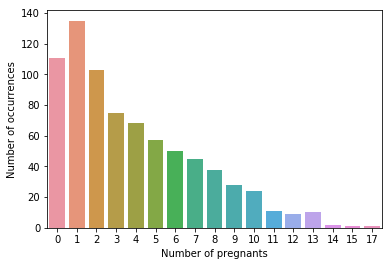

In [12]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.Pregnancies)
plt.xlabel('Number of pregnants')
plt.ylabel('Number of occurrences')

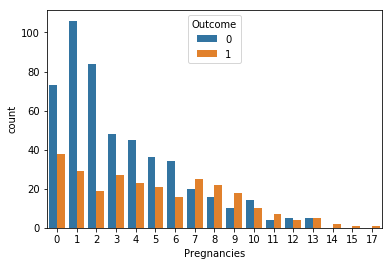

In [14]:
sns.countplot(x="Pregnancies", hue="Outcome",data=train)

Plasma_glucose_concentration

血浆葡萄糖浓度


/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Number of occurrences')

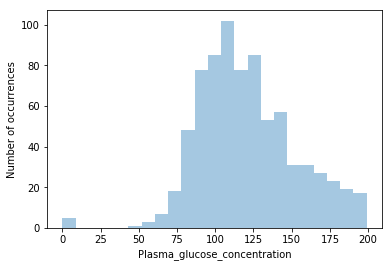

In [15]:
fig = plt.figure()
sns.distplot(train.Glucose, kde = False)
plt.xlabel('Plasma_glucose_concentration')
plt.ylabel('Number of occurrences')

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


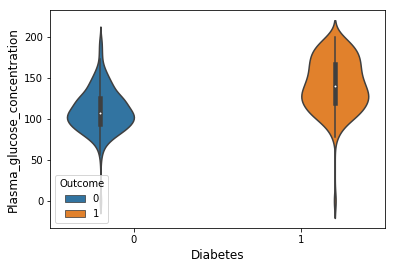

In [18]:
sns.violinplot(x='Outcome', y='Glucose', data=train, hue="Outcome")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Plasma_glucose_concentration', fontsize=12)
plt.show()

blood_pressure

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'frequency')

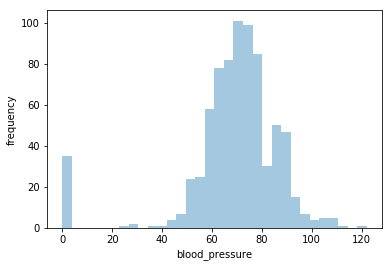

In [19]:
fig = plt.figure()
sns.distplot(train.BloodPressure, kde = False)
plt.xlabel('blood_pressure')
plt.ylabel('frequency')

出现了血压为0?
查看blood_pressure与标签之间的关系

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


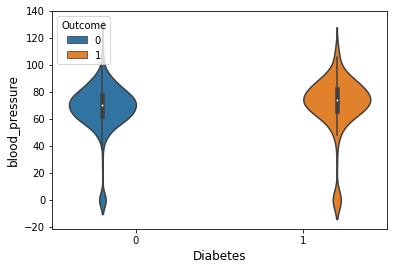

In [20]:
sns.violinplot(x='Outcome', y='BloodPressure', data=train, hue="Outcome")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('blood_pressure', fontsize=12)
plt.show()

Triceps_skin_fold_thickness

三头肌皮褶厚度（单位：mm）


Text(0.5,1,'Distribution of Triceps_skin_fold_thickness')

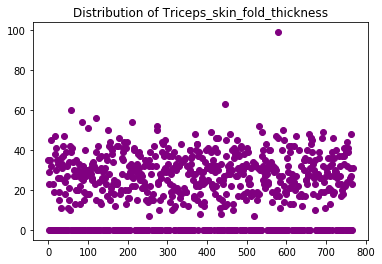

In [21]:
plt.scatter(range(train.shape[0]), train["SkinThickness"].values,color='purple')
plt.title("Distribution of Triceps_skin_fold_thickness")

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'frequency')

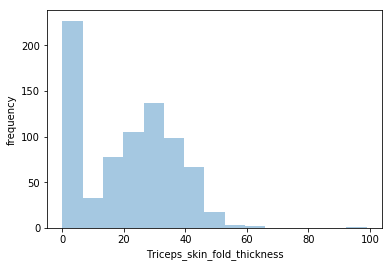

In [22]:
fig = plt.figure()
sns.distplot(train.SkinThickness, kde = False)
plt.xlabel('Triceps_skin_fold_thickness')
plt.ylabel('frequency')

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


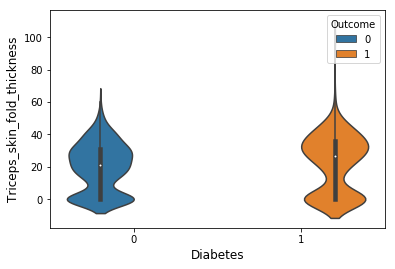

In [24]:
sns.violinplot(x='Outcome', y='SkinThickness', data=train, hue="Outcome")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Triceps_skin_fold_thickness', fontsize=12)
plt.show()

serum_insulin

餐后血清胰岛素（单位:mm）


/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'frequency')

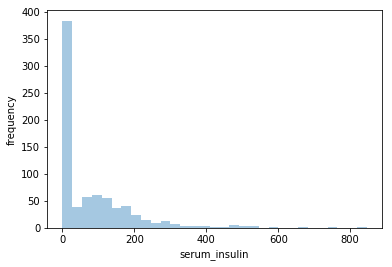

In [27]:
fig = plt.figure()
sns.distplot(train.Insulin, kde = False)
plt.xlabel('serum_insulin')
plt.ylabel('frequency')

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


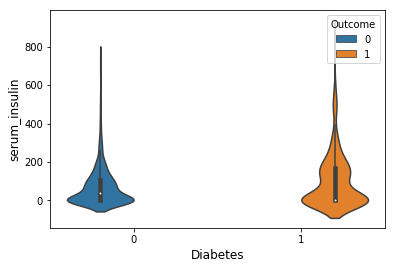

In [28]:
sns.violinplot(x='Outcome', y='Insulin', data=train, hue="Outcome")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('serum_insulin', fontsize=12)
plt.show()

BMI

体重指数（体重（公斤）/ 身高（米）^2）


/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'frequency')

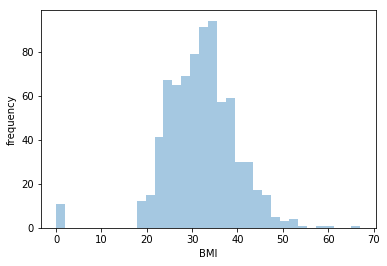

In [29]:
fig = plt.figure()
sns.distplot(train.BMI, kde = False)
plt.xlabel('BMI')
plt.ylabel('frequency')

BMI=0?为缺失值

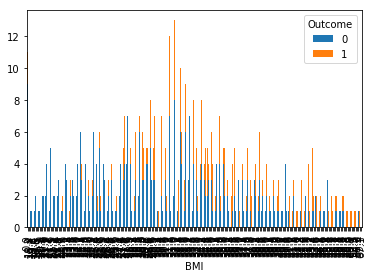

In [30]:
BMIDF = train.groupby(['BMI', 'Outcome'])['BMI'].count().unstack('Outcome').fillna(0)
BMIDF[[0,1]].plot(kind='bar', stacked=True)

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'frequency')

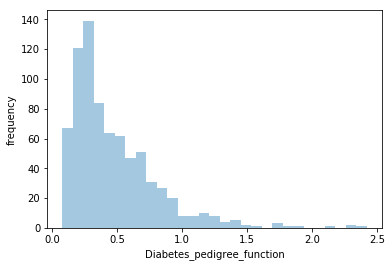

In [32]:
###Diabetes_pedigree_function，糖尿病家系作用
fig = plt.figure()
sns.distplot(train.DiabetesPedigreeFunction, kde = False)
plt.xlabel('Diabetes_pedigree_function')
plt.ylabel('frequency')

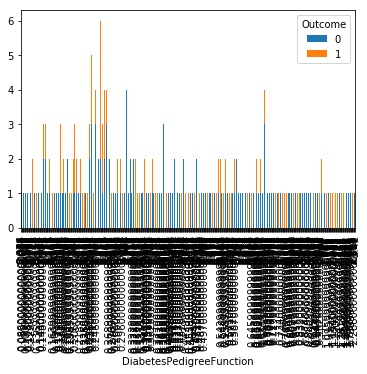

In [33]:
DF = train.groupby(['DiabetesPedigreeFunction', 'Outcome'])['DiabetesPedigreeFunction'].count().unstack('Outcome').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

Age

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'frequency')

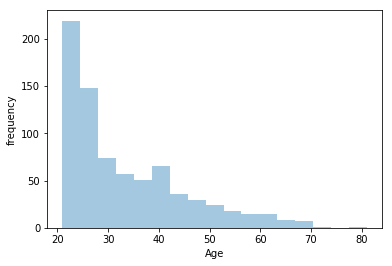

In [34]:
fig = plt.figure()
sns.distplot(train.Age, kde = False)
plt.xlabel('Age')
plt.ylabel('frequency')

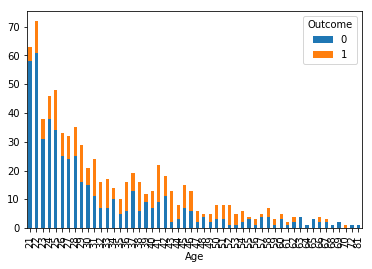

In [35]:
DF = train.groupby(['Age', 'Outcome'])['Age'].count().unstack('Outcome').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)

## 特征之间的相关性

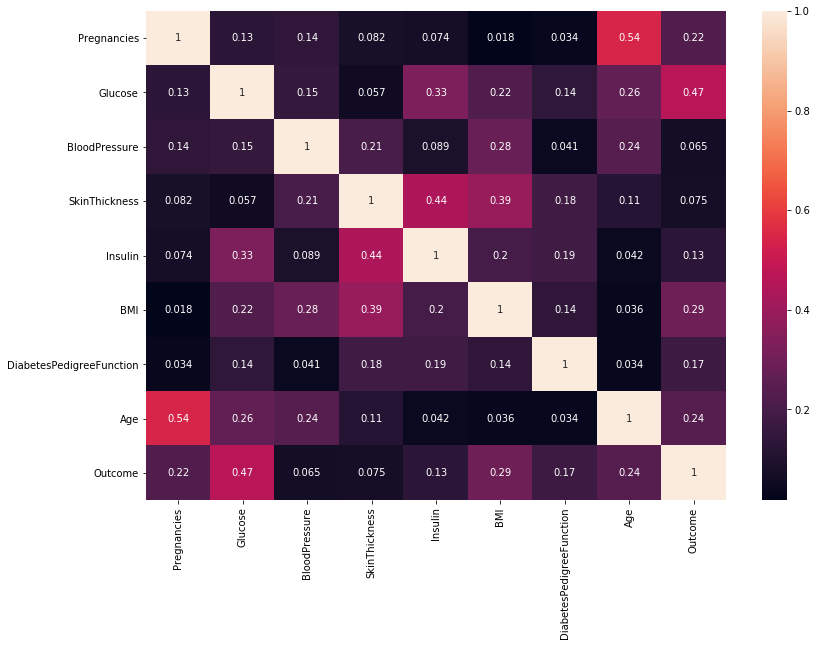

In [37]:
data_corr = train.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

/home/shnu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


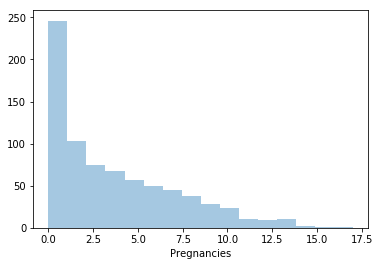

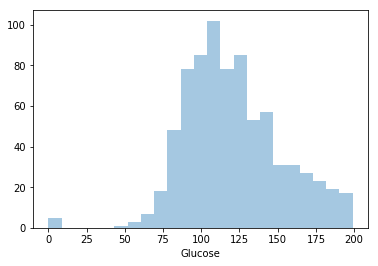

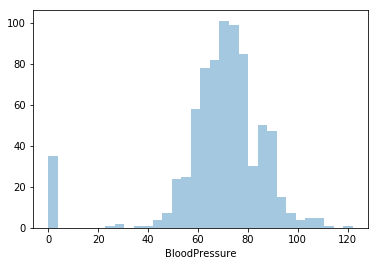

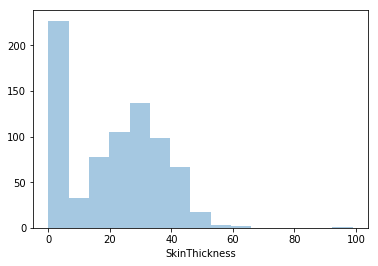

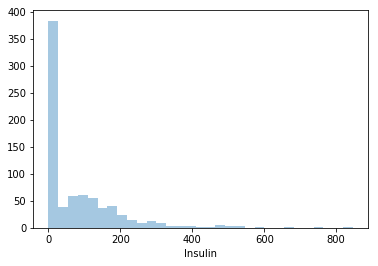

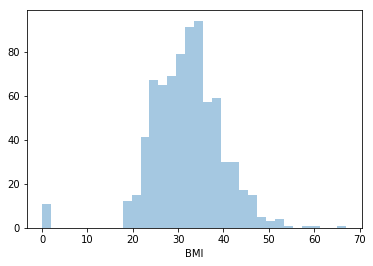

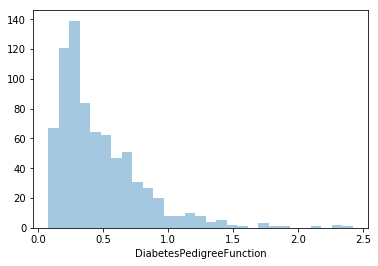

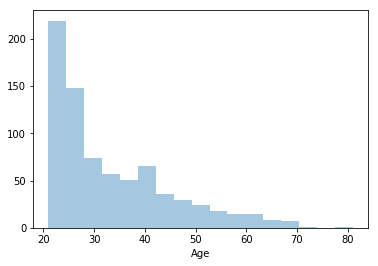

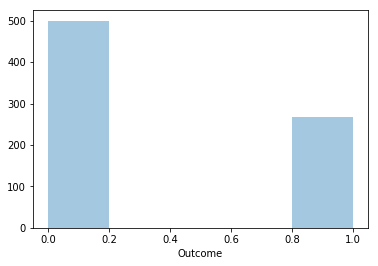

In [38]:
for feature in train.columns:
    sns.distplot(train[feature],kde = False)
    plt.show()